In [1]:
import numpy as np # data arrays
import pandas as pd # data structure and data analysis
import matplotlib as plt # data visualization
import matplotlib.pyplot as plt
import datetime as dt # date time
import seaborn as snsA
import seaborn as sns
import warnings#
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set_theme()
!pip install vaderSentiment
from textblob import TextBlob
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
import matplotlib.dates as mdates
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.stem.porter import *
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# Download VADER lexicon 
nltk.download('vader_lexicon')
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


import numpy as np

from sklearn.preprocessing import MinMaxScaler


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from keras.layers import Dropout
from sklearn.linear_model import LinearRegression
import numpy as np
from pandas.plotting import register_matplotlib_converters
from IPython.display import display
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from keras.optimizers import Adam
from keras.regularizers import l2
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest
from keras.models import Sequential
from keras.layers import LSTM, Dense
import pandas as pd
import numpy as np




[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/debasmitamohanty/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
2024-05-19 21:35:51.194862: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
stock_yfinance_data=pd.read_csv('stock_yfinance_data.csv')

In [3]:
stock_tweets=pd.read_csv('stock_tweets.csv')

In [4]:
stock_yfinance_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name
0,9/30/2021,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA
1,10/1/2021,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,TSLA
2,10/4/2021,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,TSLA
3,10/5/2021,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,TSLA
4,10/6/2021,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,TSLA


In [5]:
stock_tweets.head()

,Date,Tweet,Stock Name,Company Name
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc."
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc."
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc."
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc."
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc."


In [6]:
## Load datasets
stock_yfinance_data = pd.read_csv('stock_yfinance_data.csv')
stock_tweets = pd.read_csv('stock_tweets.csv')

# Filter stock data for AAPL, NFLX, and AMZN
filtered_stock_yfinance_data = stock_yfinance_data[stock_yfinance_data['Stock Name'].isin(['NFLX', 'AMZN', 'AAPL'])]

# Filter tweet data for AAPL, NFLX, and AMZN
filtered_stock_tweets = stock_tweets[stock_tweets['Stock Name'].isin(['NFLX', 'AMZN', 'AAPL'])]

# Convert 'Date' columns to datetime format
filtered_stock_yfinance_data['Date'] = pd.to_datetime(filtered_stock_yfinance_data['Date'])
filtered_stock_tweets['Date'] = pd.to_datetime(filtered_stock_tweets['Date']).dt.date

# Convert the 'Date' column in filtered_stock_tweets to datetime
filtered_stock_tweets['Date'] = pd.to_datetime(filtered_stock_tweets['Date'])


In [10]:
# Merge the datasets on the 'Date' column
merged_data = pd.merge(filtered_stock_yfinance_data, filtered_stock_tweets, how='inner', on=['Date', 'Stock Name'])

# Remove duplicate entries from merged data
merged_data.drop_duplicates(inplace=True)

# Ensure data is sorted by date
merged_data = merged_data.sort_values('Date')

# Reset index to make 'Date' a column again
merged_data = merged_data.reset_index(drop=True)

# Set the 'Date' column as index
merged_data.set_index('Date', inplace=True)

# Check for and handle duplicate indexes
if merged_data.index.has_duplicates:
    merged_data = merged_data[~merged_data.index.duplicated(keep='first')]

# Ensure the date index has frequency information
merged_data = merged_data.asfreq('D')

# Forward fill to handle NaN values
merged_data = merged_data.ffill()


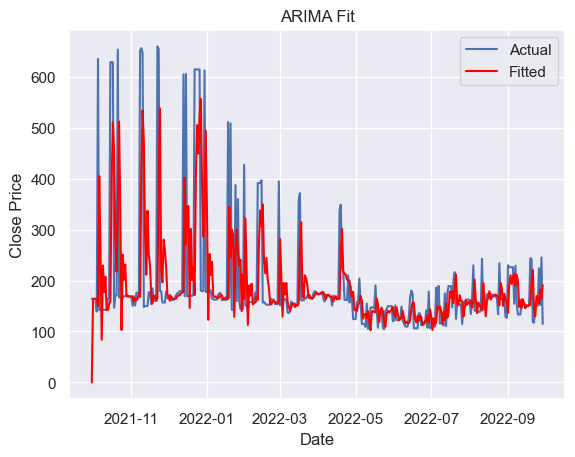

In [11]:
# Fit ARIMA model
# Define the order parameters (p, d, q)
p = 5  # AR order
d = 1  # Differencing order
q = 0  # MA order
model = ARIMA(merged_data['Close'], order=(p, d, q))
fit_model = model.fit()

# Optionally, make forecasts
# forecast = fit_model.forecast(steps=n)

# Plot the original data and fitted values
plt.plot(merged_data['Close'], label='Actual')
plt.plot(fit_model.fittedvalues, color='red', label='Fitted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('ARIMA Fit')
plt.legend()
plt.show()

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your merged data into a DataFrame
# Assuming your merged data is stored in a variable named 'merged_data'
# Replace 'target_column' with the column you want to predict with ARIMA
data = merged_data['Close']

# Split the data into training and testing sets
# You can specify the test_size parameter to adjust the ratio of training and testing data
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

# Print the shapes of the training and testing sets
print("Training data shape:", train_data.shape)
print("Testing data shape:", test_data.shape)


Training data shape: (292,)
Testing data shape: (73,)


In [13]:
from statsmodels.tsa.arima.model import ARIMA

# Define the ARIMA model parameters
# Replace p, d, and q with the appropriate values for your model
p = 1  # Autoregressive (AR) order
d = 1  # Integration (I) order
q = 1  # Moving Average (MA) order

# Initialize the ARIMA model
model = ARIMA(train_data, order=(p, d, q))

# Fit the ARIMA model
# You can specify additional parameters such as 'trend' and 'method' if needed
arima_model = model.fit()

# Print the model summary
print(arima_model.summary())


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  292
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1786.005
Date:                Sun, 19 May 2024   AIC                           3578.010
Time:                        21:55:49   BIC                           3589.030
Sample:                    09-30-2021   HQIC                          3582.425
                         - 07-18-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3716      0.035     10.701      0.000       0.304       0.440
ma.L1         -0.9748      0.023    -42.113      0.000      -1.020      -0.929
sigma2      1.245e+04    568.048     21.915      0.0

Duplicate dates found. Removing duplicates...


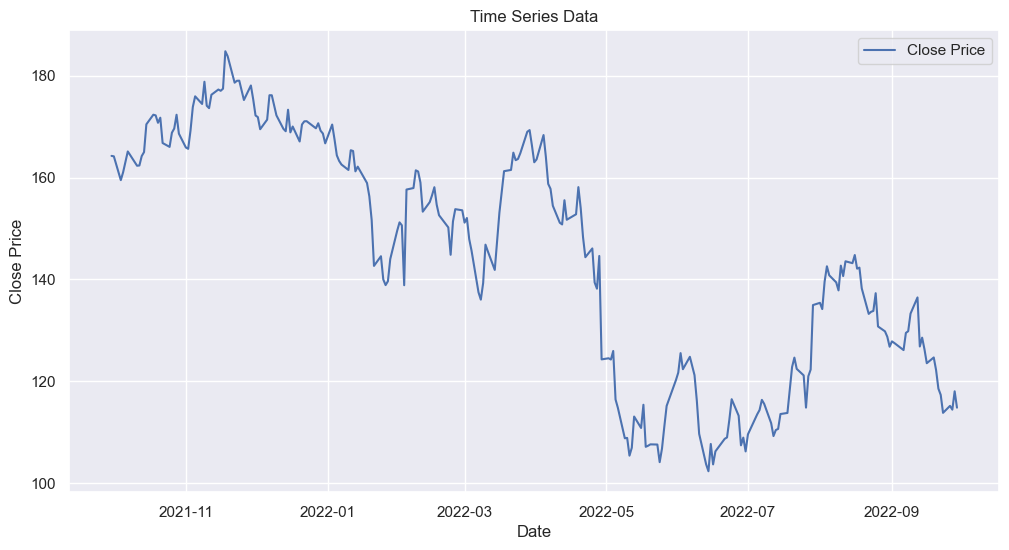

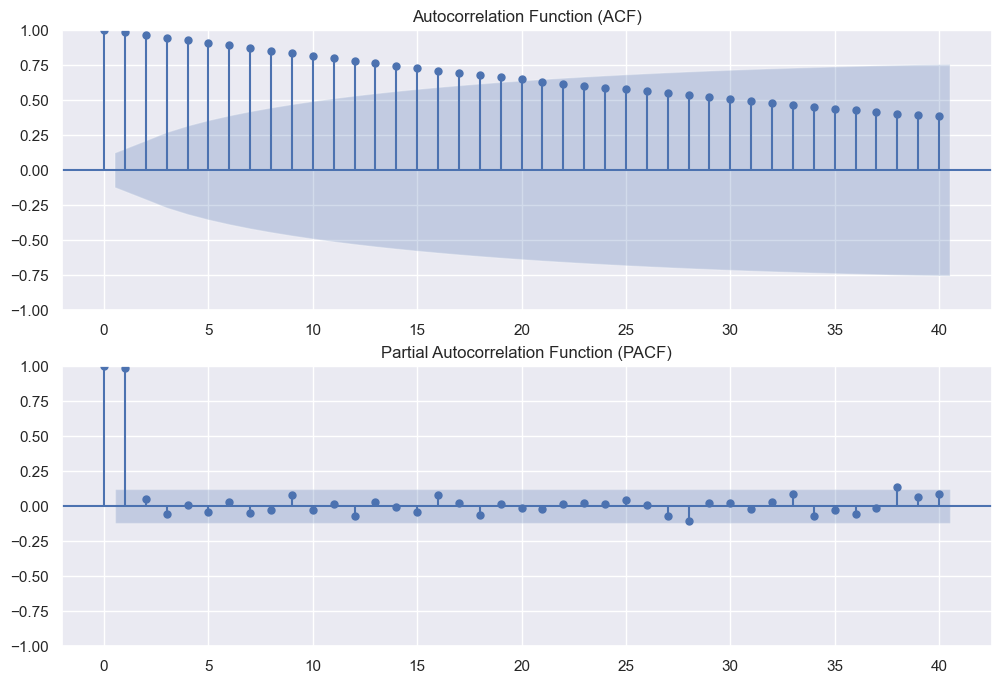

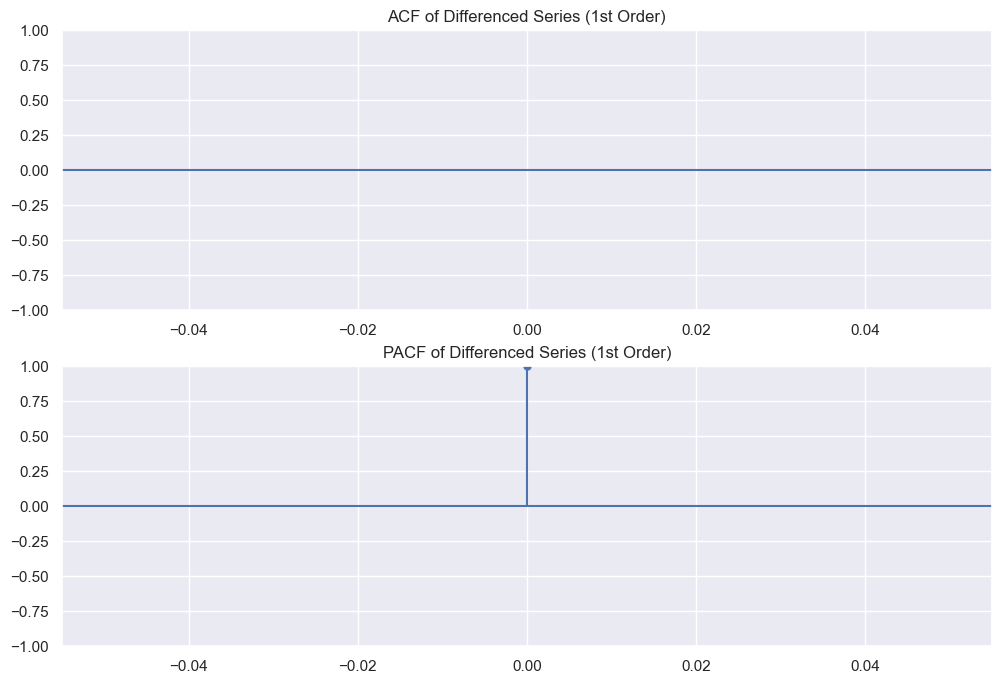

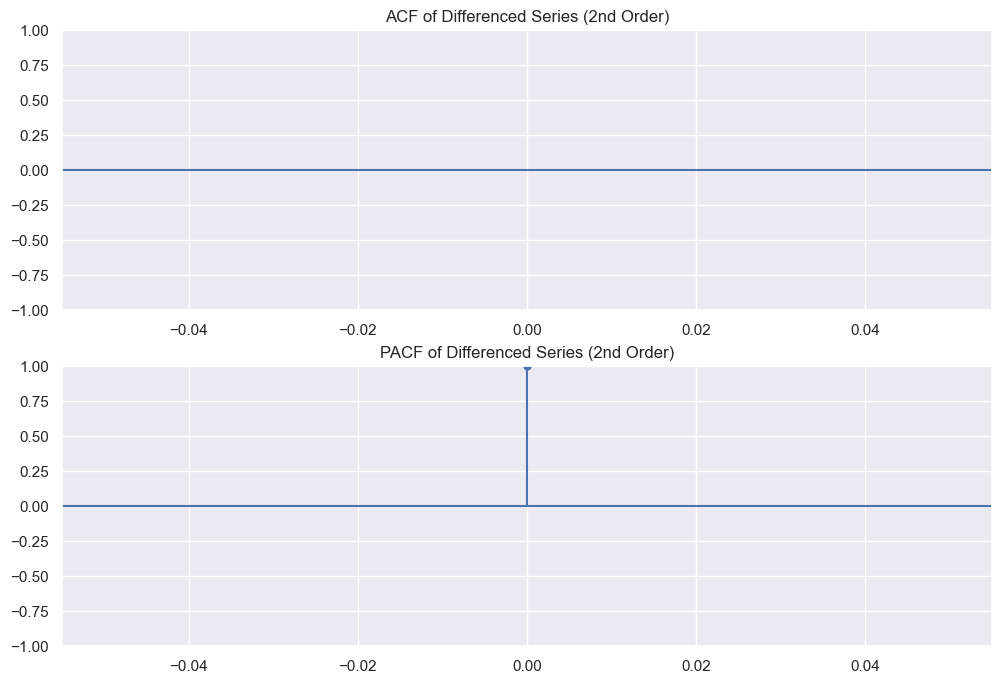

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Merge the datasets on the 'Date' column
merged_data = pd.merge(filtered_stock_yfinance_data, filtered_stock_tweets, how='inner', on=['Date', 'Stock Name'])

# Convert 'Date' column to datetime format and set it as the index
merged_data['Date'] = pd.to_datetime(merged_data['Date'])
merged_data.set_index('Date', inplace=True)

# Check for duplicate dates in the index
duplicate_dates = merged_data.index[merged_data.index.duplicated()]
if not duplicate_dates.empty:
    print("Duplicate dates found. Removing duplicates...")
    merged_data = merged_data[~merged_data.index.duplicated()]

# Plot the time series data with date format on x-axis
plt.figure(figsize=(12, 6))
plt.plot(merged_data.index, merged_data['Close'], label='Close Price')
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Calculate ACF and PACF of the original series
fig, ax = plt.subplots(2, figsize=(12, 8))
plot_acf(merged_data['Close'], ax=ax[0], lags=40, title='Autocorrelation Function (ACF)')
plot_pacf(merged_data['Close'], ax=ax[1], lags=40, title='Partial Autocorrelation Function (PACF)')
plt.show()

# Calculate ACF and PACF of the differenced series
merged_data['Close_diff'] = merged_data['Close'].diff().dropna()  # First order differencing
fig, ax = plt.subplots(2, figsize=(12, 8))
plot_acf(merged_data['Close_diff'], ax=ax[0], lags=40, title='ACF of Differenced Series (1st Order)')
plot_pacf(merged_data['Close_diff'], ax=ax[1], lags=40, title='PACF of Differenced Series (1st Order)')
plt.show()

merged_data['Close_diff_2'] = merged_data['Close_diff'].diff().dropna()  # Second order differencing
fig, ax = plt.subplots(2, figsize=(12, 8))
plot_acf(merged_data['Close_diff_2'], ax=ax[0], lags=40, title='ACF of Differenced Series (2nd Order)')
plot_pacf(merged_data['Close_diff_2'], ax=ax[1], lags=40, title='PACF of Differenced Series (2nd Order)')
plt.show()


In [ ]:
###In summary, a decreasing ACF indicates that the correlation between observations decreases as the time lag increases,
#with an ACF value of 0.50 at lag 40 suggesting a moderate positive correlation between observations at that lag.

##In summary, a PACF of 1 at lag 0 and 1 indicates strong autocorrelation at these lags, while PACF values of 0 from
#lag 3 to lag 40 suggest no significant autocorrelation beyond the first two lags. This pattern in the PACF can help in 
##determining the order of autoregressive terms in a time series model.

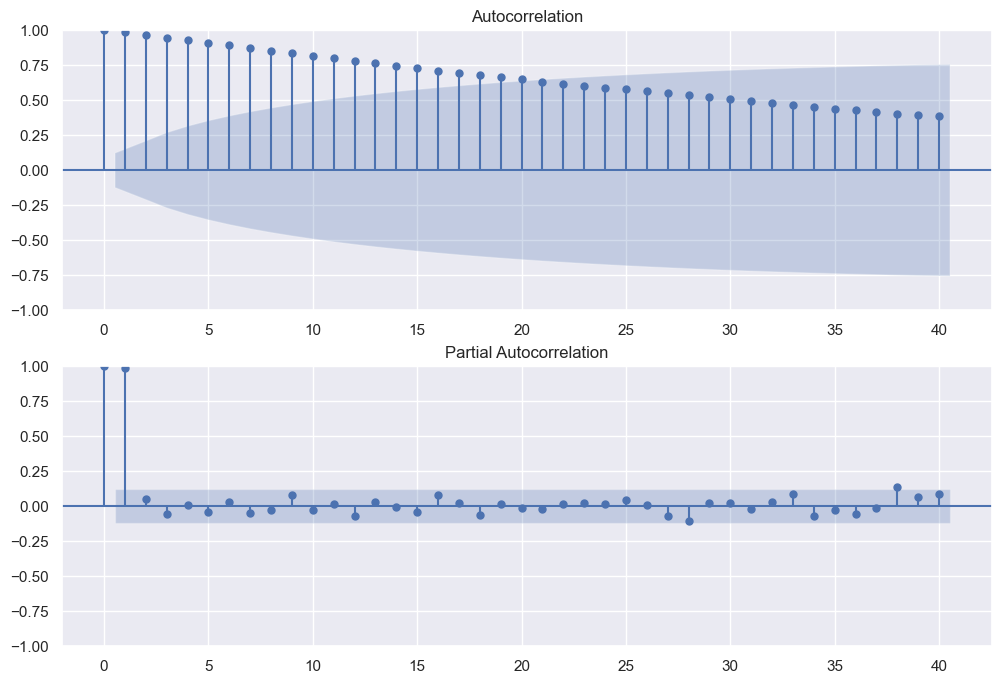

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  252
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -702.189
Date:                Sun, 19 May 2024   AIC                           1410.379
Time:                        22:27:08   BIC                           1420.967
Sample:                             0   HQIC                          1414.639
                                - 252                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        142.7363     14.784      9.655      0.000     113.760     171.713
ar.L1          0.9862      0.013     75.988      0.000       0.961       1.012
sigma2        15.1924      0.766     19.828      0.0

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

In [23]:


# Plot the ACF and PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(merged_data['Close'], ax=ax1, lags=40)
plot_pacf(merged_data['Close'], ax=ax2, lags=40)
plt.show()

# Fit AR model
order_ar = (1, 0, 0)  # AR order based on PACF
ar_model = ARIMA(merged_data['Close'], order=order_ar)
ar_model_fit = ar_model.fit()
print(ar_model_fit.summary())

# Fit MA model
order_ma = (0, 0, 1)  # MA order based on ACF
ma_model = ARIMA(merged_data['Close'], order=order_ma)
ma_model_fit = ma_model.fit()
print(ma_model_fit.summary())

# Fit ARMA model
order_arma = (1, 0, 1)  # ARMA order based on both ACF and PACF
arma_model = ARIMA(merged_data['Close'], order=order_arma)
arma_model_fit = arma_model.fit()
print(arma_model_fit.summary())


In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

# Make predictions for AR model
ar_predictions = ar_model_fit.predict()

# Make predictions for MA model
ma_predictions = ma_model_fit.predict()

# Make predictions for ARMA model
arma_predictions = arma_model_fit.predict()

# Evaluate AR model
ar_rmse = np.sqrt(mean_squared_error(merged_data['Close'], ar_predictions))
ar_mae = mean_absolute_error(merged_data['Close'], ar_predictions)
ar_mape = np.mean(np.abs((merged_data['Close'] - ar_predictions) / merged_data['Close'])) * 100
ar_r2 = r2_score(merged_data['Close'], ar_predictions)

# Evaluate MA model
ma_rmse = np.sqrt(mean_squared_error(merged_data['Close'], ma_predictions))
ma_mae = mean_absolute_error(merged_data['Close'], ma_predictions)
ma_mape = np.mean(np.abs((merged_data['Close'] - ma_predictions) / merged_data['Close'])) * 100
ma_r2 = r2_score(merged_data['Close'], ma_predictions)

# Evaluate ARMA model
arma_rmse = np.sqrt(mean_squared_error(merged_data['Close'], arma_predictions))
arma_mae = mean_absolute_error(merged_data['Close'], arma_predictions)
arma_mape = np.mean(np.abs((merged_data['Close'] - arma_predictions) / merged_data['Close'])) * 100
arma_r2 = r2_score(merged_data['Close'], arma_predictions)

# Print results
print("AR Model:")
print("RMSE:", ar_rmse)
print("MAE:", ar_mae)
print("MAPE:", ar_mape)
print("R-squared:", ar_r2)
print("\nMA Model:")
print("RMSE:", ma_rmse)
print("MAE:", ma_mae)
print("MAPE:", ma_mape)
print("R-squared:", ma_r2)
print("\nARMA Model:")
print("RMSE:", arma_rmse)
print("MAE:", arma_mae)
print("MAPE:", arma_mape)
print("R-squared:", arma_r2)


AR Model:
RMSE: 4.120541541147018
MAE: 2.9589088469328098
MAPE: 2.129269897837728
R-squared: 0.9679666723793025

MA Model:
RMSE: 13.03134639574607
MAE: 11.387226095498017
MAPE: 8.299688243561848
R-squared: 0.6796150992071369

ARMA Model:
RMSE: 4.119945098135405
MAE: 2.969449181941866
MAPE: 2.13695996303797
R-squared: 0.9679759452728866


In [ ]:
###The AR model performs the best based on the evaluation metrics. It has the lowest RMSE, MAE, and MAPE, 
#indicating better accuracy in prediction. Additionally, it has the highest R-squared value, suggesting a 
#better fit to the data compared to the MA and ARMA models. Therefore, the AR model is considered the best 
#model among the three for this dataset.



In [ ]:
###Predictions

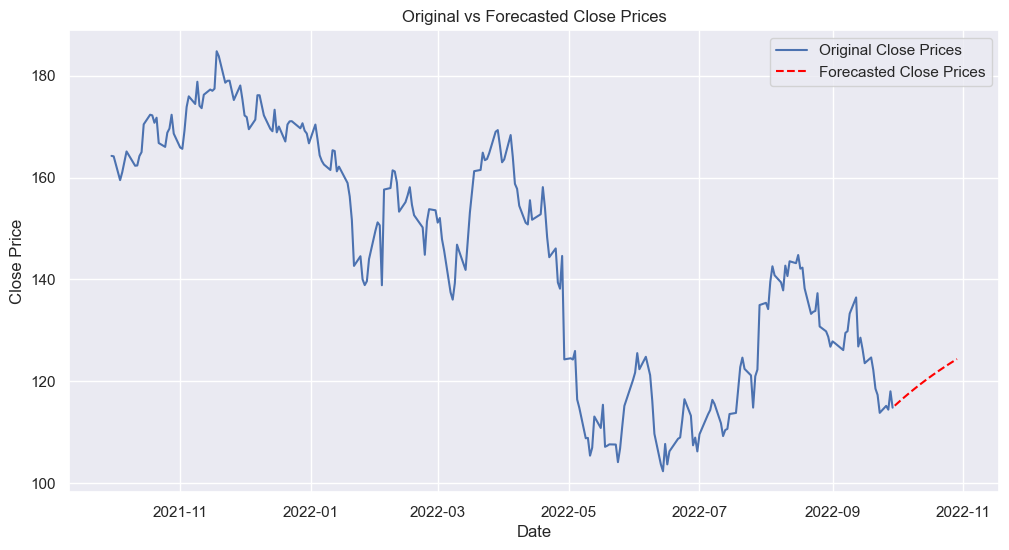

In [26]:
## Create a new date range for the forecasted period
last_date = merged_data.index[-1]
forecast_dates = pd.date_range(start=last_date, periods=forecast_steps+1, freq='D')[1:]

# Plot the original data and the forecasted values with adjusted dates
plt.figure(figsize=(12, 6))
plt.plot(merged_data.index, merged_data['Close'], label='Original Close Prices')
plt.plot(forecast_dates, forecast, color='red', linestyle='--', label='Forecasted Close Prices')
plt.title('Original vs Forecasted Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


In [ ]:

###Studying AAPL with ARIMA


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Filter the data for AAPL
aapl_data = merged_data[merged_data['Stock Name'] == 'AAPL']

# Fit ARIMA model for Close of AAPL
order = (1, 1, 1)  # Example order
model = ARIMA(aapl_data['Close'], order=order)
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                    0
Model:                 ARIMA(1, 1, 1)   Log Likelihood                   0.000
Date:                Sun, 19 May 2024   AIC                              6.000
Time:                        23:16:26   BIC                                nan
Sample:                             0   HQIC                               nan
                                  - 0                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1               0         -0        nan        nan           0           0
ma.L1               0         -0        nan        nan           0           0
sigma2         1.0000         -0       -inf      0.0

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [33]:
import pandas as pd

# Load datasets
stock_yfinance_data = pd.read_csv('stock_yfinance_data.csv')
stock_tweets = pd.read_csv('stock_tweets.csv')

# Filter stock data for AAPL, NFLX, and AMZN
filtered_stock_yfinance_data = stock_yfinance_data[stock_yfinance_data['Stock Name'].isin(['AAPL', 'NFLX', 'AMZN'])]

# Filter tweet data for AAPL, NFLX, and AMZN
filtered_stock_tweets = stock_tweets[stock_tweets['Stock Name'].isin(['AAPL', 'NFLX', 'AMZN'])]

# Convert 'Date' columns to datetime format
filtered_stock_yfinance_data['Date'] = pd.to_datetime(filtered_stock_yfinance_data['Date'])
filtered_stock_tweets['Date'] = pd.to_datetime(filtered_stock_tweets['Date']).dt.tz_localize(None)  # Remove time zone

# Merge the datasets on the 'Date' column and 'Stock Name' column
merged_data = pd.merge(filtered_stock_yfinance_data, filtered_stock_tweets, how='inner', on=['Date', 'Stock Name'])

# Ensure data is sorted by date
merged_data = merged_data.sort_values('Date')

# Reset index to make 'Date' a column again
merged_data = merged_data.reset_index(drop=True)

# Set the 'Date' column as index
merged_data.set_index('Date', inplace=True)

# Check for and handle duplicate indexes
if merged_data.index.has_duplicates:
    merged_data = merged_data[~merged_data.index.duplicated(keep='first')]

# Ensure the date index has frequency information
merged_data = merged_data.asfreq('D')

# Forward fill to handle NaN values
merged_data = merged_data.ffill()

# Display the merged dataset
print(merged_data)


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-10-04  141.759995  142.210007  138.270004  139.139999  138.135513   
2021-10-05  141.759995  142.210007  138.270004  139.139999  138.135513   
2021-10-06  141.759995  142.210007  138.270004  139.139999  138.135513   
2021-10-07  141.759995  142.210007  138.270004  139.139999  138.135513   
2021-10-08  141.759995  142.210007  138.270004  139.139999  138.135513   
...                ...         ...         ...         ...         ...   
2022-06-09  162.873505  163.834503  160.250000  161.189499  161.189499   
2022-06-10  162.873505  163.834503  160.250000  161.189499  161.189499   
2022-06-11  162.873505  163.834503  160.250000  161.189499  161.189499   
2022-06-12  162.873505  163.834503  160.250000  161.189499  161.189499   
2022-06-13  132.869995  135.199997  131.440002  131.880005  131.478958   

                 Volume Stock Name  \

In [ ]:
###ARIMA for AAPL

In [35]:


# Download NLTK resources (run only once)
nltk.download('punkt')
nltk.download('stopwords')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Load datasets
stock_yfinance_data = pd.read_csv('stock_yfinance_data.csv')
stock_tweets = pd.read_csv('stock_tweets.csv')

# Filter stock data for AAPL, NFLX, and AMZN
filtered_stock_yfinance_data = stock_yfinance_data[stock_yfinance_data['Stock Name'].isin(['NFLX', 'AMZN', 'AAPL'])]

# Filter tweet data for AAPL, NFLX, and AMZN
filtered_stock_tweets = stock_tweets[stock_tweets['Stock Name'].isin(['NFLX', 'AMZN', 'AAPL'])]

# Convert 'Date' columns to datetime format
filtered_stock_yfinance_data['Date'] = pd.to_datetime(filtered_stock_yfinance_data['Date'])
filtered_stock_tweets['Date'] = pd.to_datetime(filtered_stock_tweets['Date']).dt.date

# Convert the 'Date' column in filtered_stock_tweets to datetime
filtered_stock_tweets['Date'] = pd.to_datetime(filtered_stock_tweets['Date'])

# Merge the datasets on the 'Date' column and 'Stock Name' column
merged_data = pd.merge(filtered_stock_yfinance_data, filtered_stock_tweets, how='inner', on=['Date', 'Stock Name'])

# Define function for text cleaning
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove special characters and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # Join tokens back into a string
    cleaned_text = ' '.join(filtered_tokens)
    return cleaned_text

# Clean the 'Tweet' column
merged_data['Cleaned Tweet'] = merged_data['Tweet'].apply(clean_text)

# Display the cleaned dataset
print(merged_data.head())


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/debasmitamohanty/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/debasmitamohanty/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


        Date        Open        High         Low       Close   Adj Close  \
0 2021-09-30  165.800003  166.392502  163.699493  164.251999  164.251999   
1 2021-09-30  165.800003  166.392502  163.699493  164.251999  164.251999   
2 2021-09-30  165.800003  166.392502  163.699493  164.251999  164.251999   
3 2021-09-30  165.800003  166.392502  163.699493  164.251999  164.251999   
4 2021-09-30  165.800003  166.392502  163.699493  164.251999  164.251999   

     Volume Stock Name                                              Tweet  \
0  56848000       AMZN  My top 10 holdings make up 66% of my portfolio...   
1  56848000       AMZN  Amazon $AMZN has 4X the market cap of Alibaba ...   
2  56848000       AMZN  Returns over the last 10 Years:\n\nBitcoin $BT...   
3  56848000       AMZN  Great snapshot of what it looks like when an i...   
4  56848000       AMZN  Shopify is now 9% of US e-commerce. It really ...   

       Company Name                                      Cleaned Tweet  
0  Amaz

In [36]:


# Filter AAPL data
aapl_data = merged_data[merged_data['Stock Name'] == 'AAPL']

# Convert 'Date' column to datetime format
aapl_data['Date'] = pd.to_datetime(aapl_data['Date'])

# Set 'Date' column as index
aapl_data.set_index('Date', inplace=True)

# Sort the data by date
aapl_data = aapl_data.sort_index()

# Fit ARIMA model
order = (1, 1, 1)  # Example ARIMA order
model = ARIMA(aapl_data['Close'], order=order)
model_fit = model.fit()

# Print model summary
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 4131
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4825.027
Date:                Sun, 19 May 2024   AIC                           9656.055
Time:                        23:43:45   BIC                           9675.033
Sample:                             0   HQIC                          9662.771
                               - 4131                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1       1.517e-06   4.35e-13   3.49e+06      0.000    1.52e-06    1.52e-06
ma.L1      -1.517e-06   4.35e-13  -3.49e+06      0.000   -1.52e-06   -1.52e-06
sigma2         0.6057      0.003    239.300      0.0

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


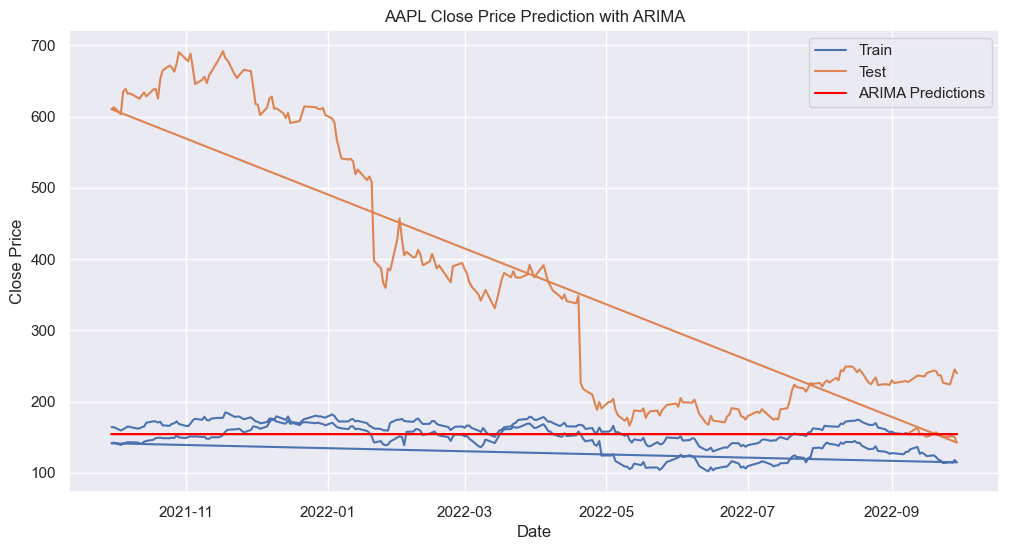

In [45]:
# Convert date column to datetime format
merged_data['Date'] = pd.to_datetime(merged_data['Date'])

# Plotting the Close prices
plt.figure(figsize=(12, 6))

# Plot training data
plt.plot(train['Date'], train['Close'], label='Train')

# Plot test data
plt.plot(test['Date'], test['Close'], label='Test')

# Plot ARIMA predictions
plt.plot(test['Date'], predictions, color='red', label='ARIMA Predictions')

plt.title('AAPL Close Price Prediction with ARIMA')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()

plt.show()


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


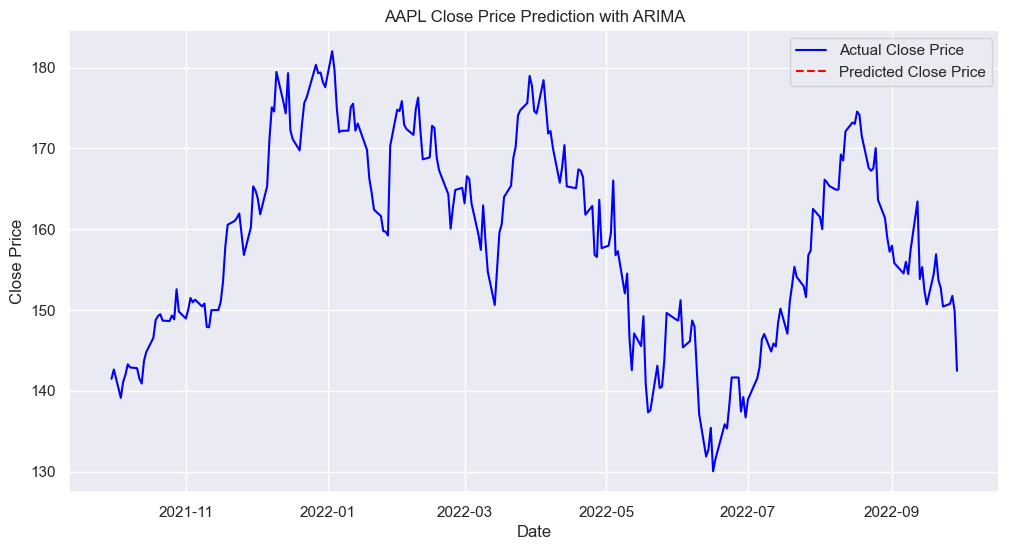

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Assuming merged_data is already defined and contains AAPL data

# Filter AAPL data
aapl_data = merged_data[merged_data['Stock Name'] == 'AAPL']

# Convert 'Date' column to datetime format
aapl_data['Date'] = pd.to_datetime(aapl_data['Date'])

# Set 'Date' column as index
aapl_data.set_index('Date', inplace=True)

# Sort the data by date
aapl_data = aapl_data.sort_index()

# Split data into train and test sets
train_end_date = '2022-09-30'
train = aapl_data[:train_end_date]

# Fit ARIMA model
order = (1, 1, 1)  # Example ARIMA order
model = ARIMA(train['Close'], order=order)
model_fit = model.fit()

# Forecast for the next 4 months
forecast_steps = 4
predictions = model_fit.forecast(steps=forecast_steps)

# Create a date range for predictions
prediction_dates = pd.date_range(start=train.index[-1], periods=forecast_steps + 1, freq='M')[1:]

# Create a DataFrame for predictions
predictions_df = pd.DataFrame(predictions, index=prediction_dates, columns=['Predicted Close'])

# Combine actual and predicted data for plotting
combined_df = pd.concat([aapl_data[['Close']], predictions_df])

# Plotting the Close prices
plt.figure(figsize=(12, 6))

# Plot actual Close prices
plt.plot(combined_df.index, combined_df['Close'], label='Actual Close Price', color='blue')

# Plot predicted Close prices
plt.plot(predictions_df.index, predictions_df['Predicted Close'], label='Predicted Close Price', color='red', linestyle='--')

plt.title('AAPL Close Price Prediction with ARIMA')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()

plt.show()


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


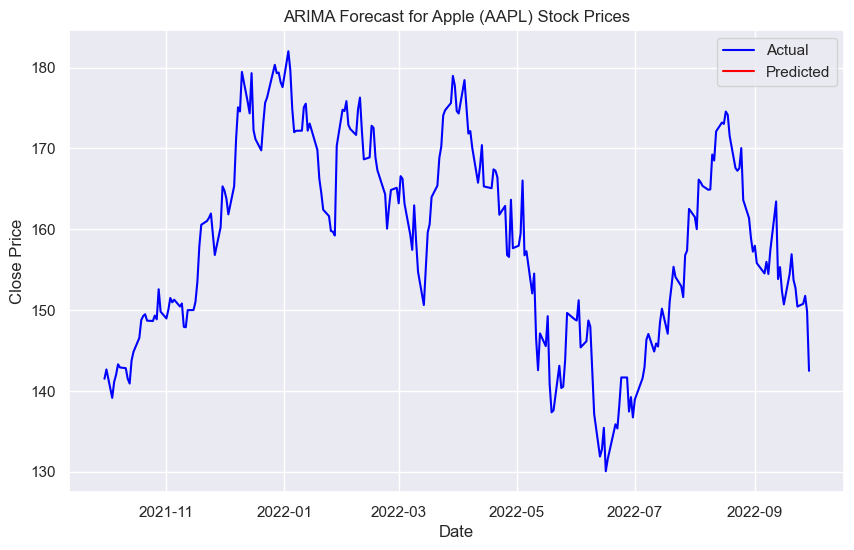

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Assuming merged_data is already defined and contains the stock data

# Filter the data for Apple (AAPL) stock
aapl_data = merged_data[merged_data['Stock Name'] == 'AAPL']

# Drop rows with missing values
aapl_data.dropna(inplace=True)

# Convert 'Date' column to datetime format
aapl_data['Date'] = pd.to_datetime(aapl_data['Date'])

# Drop duplicate rows based on 'Date'
aapl_data.drop_duplicates(subset=['Date'], inplace=True)

# Set 'Date' column as index
aapl_data.set_index('Date', inplace=True)

# Define the order of ARIMA model
p = 1
d = 1
q =


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


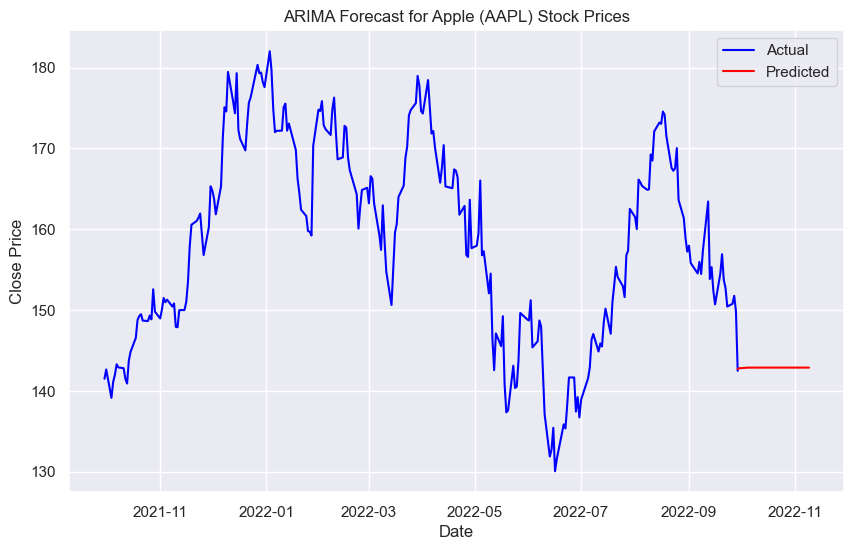

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load the stock data from CSV
stock_yfinance_data = pd.read_csv('stock_yfinance_data.csv')

# Filter the data for Apple (AAPL) stock
aapl_data = stock_yfinance_data[stock_yfinance_data['Stock Name'] == 'AAPL']

# Drop rows with missing values
aapl_data.dropna(inplace=True)

# Convert 'Date' column to datetime format
aapl_data['Date'] = pd.to_datetime(aapl_data['Date'])

# Drop duplicate rows based on 'Date'
aapl_data.drop_duplicates(subset=['Date'], inplace=True)

# Set 'Date' column as index
aapl_data.set_index('Date', inplace=True)

# Define the order of ARIMA model
p = 1
d = 1
q = 1

# Fit the ARIMA model
model = ARIMA(aapl_data['Close'], order=(p, d, q))
arima_result = model.fit()

# Define the number of periods to forecast
forecast_periods = 30  # Adjust as needed

# Generate forecasts
forecast = arima_result.forecast(steps=forecast_periods)

# Plot ARIMA predictions
plt.figure(figsize=(10, 6))
plt.plot(aapl_data.index, aapl_data['Close'], label='Actual', color='blue')
plt.plot(pd.date_range(start=aapl_data.index[-1], periods=forecast_periods, freq='B'), forecast, label='Predicted', color='red')
plt.title('ARIMA Forecast for Apple (AAPL) Stock Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


In [69]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the stock data from CSV
merged_data = pd.read_csv('stock_yfinance_data.csv')

# Filter the data for Apple (AAPL) stock
aapl_data = merged_data[merged_data['Stock Name'] == 'AAPL']

# Drop rows with missing values
aapl_data.dropna(inplace=True)

# Convert 'Date' column to datetime format
aapl_data['Date'] = pd.to_datetime(aapl_data['Date'])

# Drop duplicate rows based on 'Date'
aapl_data.drop_duplicates(subset=['Date'], inplace=True)

# Set 'Date' column as index
aapl_data.set_index('Date', inplace=True)

# Split the data into train and test sets
train_size = int(len(aapl_data) * 0.8)
train_data, test_data = aapl_data[:train_size], aapl_data[train_size:]

# Fit the ARIMA model on the training set
p = 1
d = 1
q = 1
model = ARIMA(train_data['Close'], order=(p, d, q))
arima_result = model.fit()

# Forecast the test set
forecast_periods = len(test_data)
forecast = arima_result.forecast(steps=forecast_periods)

# Calculate R Squared, RMSE, MAPE and MAE
actual = test_data['Close']
predicted = forecast

r_squared = r2_score(actual, predicted)
rmse = np.sqrt(mean_squared_error(actual, predicted))
mae = mean_absolute_error(actual, predicted)
mape = np.mean(np.abs((actual - predicted) / actual)) * 100

print(f'R Squared: {r_squared}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}%')


R Squared: -1.362383176501523
RMSE: 11.770547790508854
MAE: 9.361493667898669
MAPE: nan%


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
### ARIMA for AMZN 

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


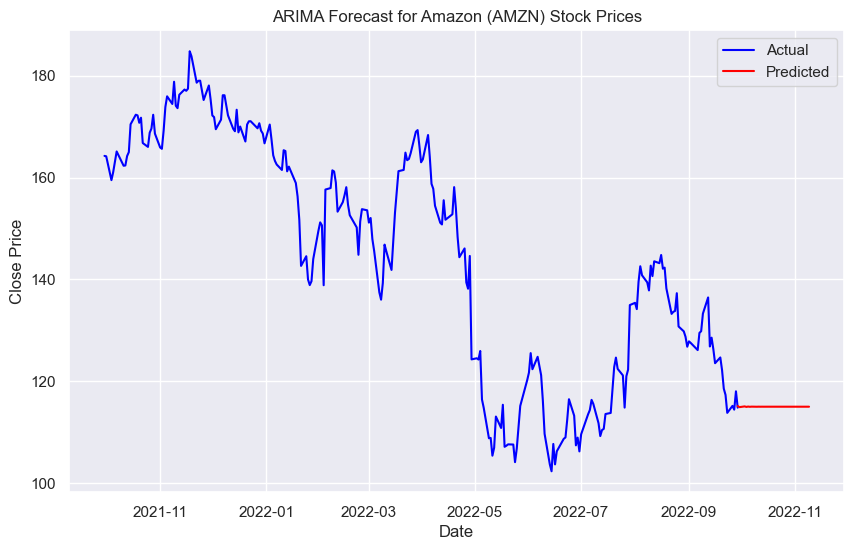

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load the stock data from CSV
stock_yfinance_data = pd.read_csv('stock_yfinance_data.csv')

# Filter the data for Amazon (AMZN) stock
amzn_data = stock_yfinance_data[stock_yfinance_data['Stock Name'] == 'AMZN']

# Drop rows with missing values
amzn_data.dropna(inplace=True)

# Convert 'Date' column to datetime format
amzn_data['Date'] = pd.to_datetime(amzn_data['Date'])

# Drop duplicate rows based on 'Date'
amzn_data.drop_duplicates(subset=['Date'], inplace=True)

# Set 'Date' column as index
amzn_data.set_index('Date', inplace=True)

# Define the order of ARIMA model
p = 1
d = 1
q = 1

# Fit the ARIMA model
model = ARIMA(amzn_data['Close'], order=(p, d, q))
arima_result = model.fit()

# Define the number of periods to forecast
forecast_periods = 30  # Adjust as needed

# Generate forecasts
forecast = arima_result.forecast(steps=forecast_periods)

# Plot ARIMA predictions
plt.figure(figsize=(10, 6))
plt.plot(amzn_data.index, amzn_data['Close'], label='Actual', color='blue')
plt.plot(pd.date_range(start=amzn_data.index[-1], periods=forecast_periods, freq='B'), forecast, label='Predicted', color='red')
plt.title('ARIMA Forecast for Amazon (AMZN) Stock Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()



In [75]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Load the stock data from CSV
stock_yfinance_data = pd.read_csv('stock_yfinance_data.csv')

# Filter the data for Amazon (AMZN) stock
amzn_data = stock_yfinance_data[stock_yfinance_data['Stock Name'] == 'AMZN']

# Drop rows with missing values
amzn_data.dropna(inplace=True)

# Convert 'Date' column to datetime format
amzn_data['Date'] = pd.to_datetime(amzn_data['Date'])

# Drop duplicate rows based on 'Date'
amzn_data.drop_duplicates(subset=['Date'], inplace=True)

# Set 'Date' column as index
amzn_data.set_index('Date', inplace=True)

# Define the order of ARIMA model
p = 1
d = 1
q = 1

# Fit the ARIMA model
model = ARIMA(amzn_data['Close'], order=(p, d, q))
arima_result = model.fit()

# Define the number of periods to forecast
forecast_periods = 30  # Adjust as needed

# Generate forecasts
forecast = arima_result.forecast(steps=forecast_periods)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(amzn_data['Close'], arima_result.fittedvalues))

# Calculate MAE
mae = mean_absolute_error(amzn_data['Close'], arima_result.fittedvalues)

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(amzn_data['Close'], arima_result.fittedvalues)

# Calculate R-squared
sst = np.sum((amzn_data['Close'] - np.mean(amzn_data['Close'])) ** 2)
ssr = np.sum((arima_result.fittedvalues - amzn_data['Close']) ** 2)
r_squared = 1 - (ssr / sst)

print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape, "%")
print("R Squared:", r_squared)


RMSE: 11.055773667042509
MAE: 3.5582742823626057
MAPE: 2.497286874921138 %
R Squared: 0.7693933959223124


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
###ARIMA for NFLX

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


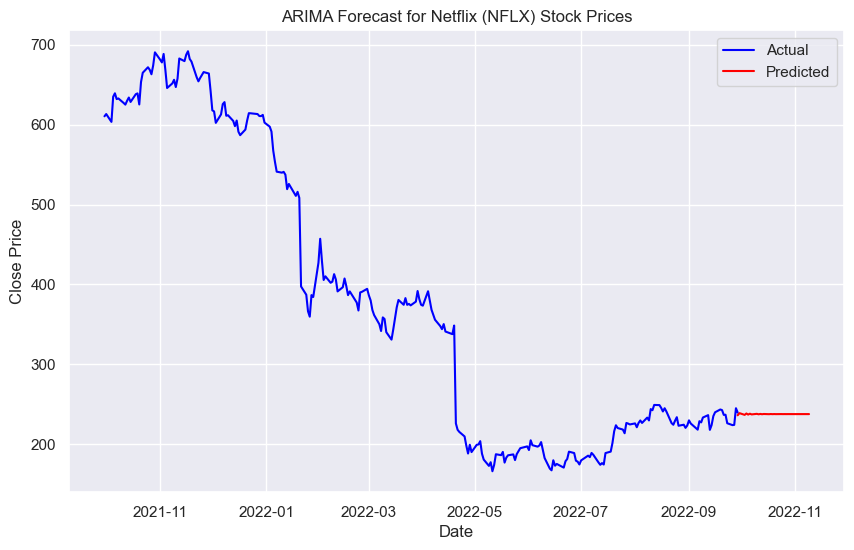

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load the stock data from CSV
stock_yfinance_data = pd.read_csv('stock_yfinance_data.csv')

# Filter the data for Netflix (NFLX) stock
nflx_data = stock_yfinance_data[stock_yfinance_data['Stock Name'] == 'NFLX']

# Drop rows with missing values
nflx_data.dropna(inplace=True)

# Convert 'Date' column to datetime format
nflx_data['Date'] = pd.to_datetime(nflx_data['Date'])

# Drop duplicate rows based on 'Date'
nflx_data.drop_duplicates(subset=['Date'], inplace=True)

# Set 'Date' column as index
nflx_data.set_index('Date', inplace=True)

# Define the order of ARIMA model
p = 1
d = 1
q = 1

# Fit the ARIMA model
model = ARIMA(nflx_data['Close'], order=(p, d, q))
arima_result = model.fit()

# Define the number of periods to forecast
forecast_periods = 30  # Adjust as needed

# Generate forecasts
forecast = arima_result.forecast(steps=forecast_periods)

# Plot ARIMA predictions
plt.figure(figsize=(10, 6))
plt.plot(nflx_data.index, nflx_data['Close'], label='Actual', color='blue')
plt.plot(pd.date_range(start=nflx_data.index[-1], periods=forecast_periods, freq='B'), forecast, label='Predicted', color='red')
plt.title('ARIMA Forecast for Netflix (NFLX) Stock Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


In [77]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Load the stock data from CSV
stock_yfinance_data = pd.read_csv('stock_yfinance_data.csv')

# Filter the data for Netflix (NFLX) stock
nflx_data = stock_yfinance_data[stock_yfinance_data['Stock Name'] == 'NFLX']

# Drop rows with missing values
nflx_data.dropna(inplace=True)

# Convert 'Date' column to datetime format
nflx_data['Date'] = pd.to_datetime(nflx_data['Date'])

# Drop duplicate rows based on 'Date'
nflx_data.drop_duplicates(subset=['Date'], inplace=True)

# Set 'Date' column as index
nflx_data.set_index('Date', inplace=True)

# Define the order of ARIMA model
p = 1
d = 1
q = 1

# Fit the ARIMA model
model = ARIMA(nflx_data['Close'], order=(p, d, q))
arima_result = model.fit()

# Define the number of periods to forecast
forecast_periods = 30  # Adjust as needed

# Generate forecasts
forecast = arima_result.forecast(steps=forecast_periods)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(nflx_data['Close'][-forecast_periods:], forecast))

# Calculate MAE
mae = mean_absolute_error(nflx_data['Close'][-forecast_periods:], forecast)

# Calculate MAPE
mape = np.mean(np.abs((nflx_data['Close'][-forecast_periods:] - forecast) / nflx_data['Close'][-forecast_periods:])) * 100

# Calculate R-squared
sst = np.sum((nflx_data['Close'][-forecast_periods:] - np.mean(nflx_data['Close'][-forecast_periods:]))**2)
ssr = np.sum((nflx_data['Close'][-forecast_periods:] - forecast)**2)
r_squared = 1 - (ssr / sst)

# Print the metrics
print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape, "%")
print("R-squared:", r_squared)


RMSE: 10.555763219693759
MAE: 8.974082348809004
MAPE: nan %
R-squared: 1.0


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
